In [1]:
import torch
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

trainData = pd.read_csv('ml100k.train.rating', header=None, names=['user', 'item', 'rate'], sep='\t')
testData = pd.read_csv('ml100k.test.rating', header=None, names=['user', 'item', 'rate'], sep='\t')

# 创建userid和itemid的映射表
user2idx = {user: idx for idx, user in enumerate(trainData.user.unique())}
item2idx = {item: idx for idx, item in enumerate(trainData.item.unique())}

# 将训练集和测试集中的userid和itemid替换为连续索引
trainData['user_idx'] = trainData['user'].map(user2idx)
trainData['item_idx'] = trainData['item'].map(item2idx)
testData['user_idx'] = testData['user'].map(user2idx)
testData['item_idx'] = testData['item'].map(item2idx)

userIdx = trainData.user_idx.values
itemIdx = trainData.item_idx.values

num_users = len(user2idx)
num_items = len(item2idx)
K = 20
lambd = 0.00001
learning_rate = 1e-3

U = torch.randn([num_users, K], requires_grad=True)
P = torch.randn([num_items, K], requires_grad=True)

optimizer = torch.optim.SGD([U, P], lr=learning_rate)

print('Training')
for epoch in range(10):
    total_loss = 0.0
    for i in range(len(trainData)):
        user_idx = trainData.iloc[i]['user_idx']
        item_idx = trainData.iloc[i]['item_idx']

        pos_pred = torch.dot(U[user_idx], P[item_idx])  # 正样本预测评分

        neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 随机选择一个负样本
        while neg_item_idx in trainData[trainData['user_idx'] == user_idx]['item_idx'].values:
            neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 确保负样本不在用户的已有物品中

        neg_pred = torch.dot(U[user_idx], P[neg_item_idx])  # 负样本预测评分

        loss = -torch.log(torch.sigmoid(pos_pred - neg_pred))  # BPR损失函数
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:', epoch + 1, 'Loss:', total_loss)


def getRanking():
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    ranking = []
    for i in range(len(testData_cleaned)):
        user_idx = int(testData_cleaned.iloc[i]['user_idx'])
        item_idx = int(testData_cleaned.iloc[i]['item_idx'])

        assert user_idx < num_users, "Invalid user index"
        assert item_idx < num_items, "Invalid item index"

        pred = torch.dot(U[user_idx], P[item_idx])
        ranking.append((user_idx, item_idx, pred.item()))

    return pd.DataFrame(ranking, columns=['user_idx', 'item_idx', 'pred'])
# def getRanking():
#     ranking = []
#     for i in range(len(testData)):
#         user_idx = int(testData.iloc[i]['user_idx'])
#         item_idx = int(testData.iloc[i]['item_idx'])
#
#         assert user_idx < num_users, "Invalid user index"
#         assert item_idx < num_items, "Invalid item index"
#
#         pred = torch.dot(U[user_idx], P[item_idx])
#         ranking.append((user_idx, item_idx, pred.item()))
#
#     return pd.DataFrame(ranking, columns=['user_idx', 'item_idx', 'pred'])
def calculate_metrics(ranking):
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    predicted_ratings = ranking['pred'].values
    actual_ratings = testData_cleaned['rate'].values
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    return rmse, mae

print('Testing')
ranking = getRanking()
print(ranking.head())

rmse, mae = calculate_metrics(ranking)
print('RMSE:', rmse)
print('MAE:', mae)

Training
Epoch: 1 Loss: 254846.28812235815
Epoch: 2 Loss: 246094.0535204807
Epoch: 3 Loss: 235454.7132179242
Epoch: 4 Loss: 229058.86723429867
Epoch: 5 Loss: 220052.63918779104
Epoch: 6 Loss: 212426.87757357332
Epoch: 7 Loss: 206157.4118424786
Epoch: 8 Loss: 197099.01603898488
Epoch: 9 Loss: 191893.1527862247
Epoch: 10 Loss: 185142.85084331137
Testing
   user_idx  item_idx      pred
0       116      1348 -1.874973
1       226       149 -3.246276
2       263       109  4.171101
3       261       228 -0.987676
4       109      1336  0.171308
RMSE: 4.972877261043315
MAE: 3.9896209257062005


Training
Epoch: 1 Loss: 252801.9826868713
Epoch: 2 Loss: 241139.6471762571
Epoch: 3 Loss: 232986.85913293308
Epoch: 4 Loss: 224972.55666012783
Epoch: 5 Loss: 218933.32260596225
Epoch: 6 Loss: 210266.57464683597
Epoch: 7 Loss: 202373.61350724087
Epoch: 8 Loss: 195118.23696441326
Epoch: 9 Loss: 188437.73308651173
Epoch: 10 Loss: 182261.38250367588


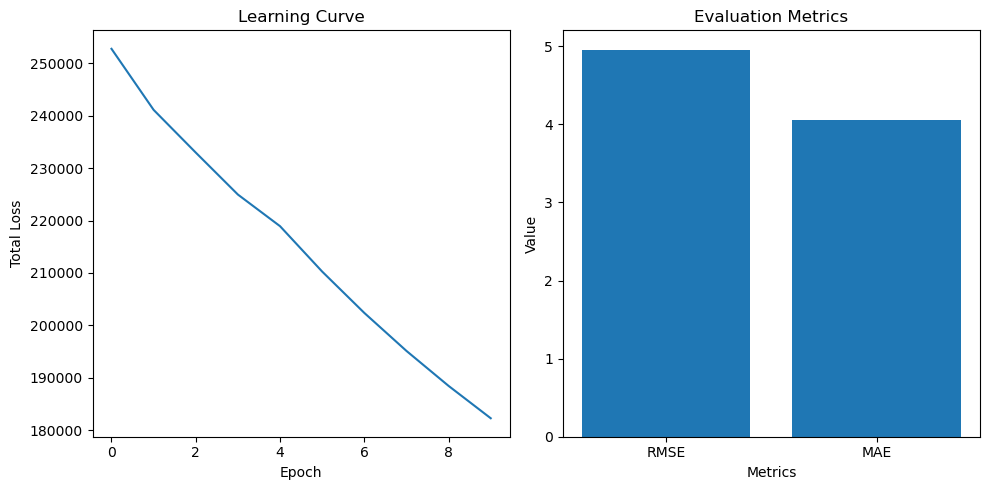

Testing
   user_idx  item_idx      pred
0       116      1348  5.754060
1       226       149  5.243676
2       263       109  2.573401
3       261       228  1.524440
4       109      1336 -0.858259
RMSE: 4.955264217982365
MAE: 4.051295189481866


In [3]:
import torch
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

trainData = pd.read_csv('ml100k.train.rating', header=None, names=['user', 'item', 'rate'], sep='\t')
testData = pd.read_csv('ml100k.test.rating', header=None, names=['user', 'item', 'rate'], sep='\t')

# 创建userid和itemid的映射表
user2idx = {user: idx for idx, user in enumerate(trainData.user.unique())}
item2idx = {item: idx for idx, item in enumerate(trainData.item.unique())}

# 将训练集和测试集中的userid和itemid替换为连续索引
trainData['user_idx'] = trainData['user'].map(user2idx)
trainData['item_idx'] = trainData['item'].map(item2idx)
testData['user_idx'] = testData['user'].map(user2idx)
testData['item_idx'] = testData['item'].map(item2idx)

userIdx = trainData.user_idx.values
itemIdx = trainData.item_idx.values

num_users = len(user2idx)
num_items = len(item2idx)
K = 20
lambd = 0.00001
learning_rate = 1e-3

U = torch.randn([num_users, K], requires_grad=True)
P = torch.randn([num_items, K], requires_grad=True)

optimizer = torch.optim.SGD([U, P], lr=learning_rate)

print('Training')

loss_values = []  # 用于存储损失函数值的列表

for epoch in range(10):
    total_loss = 0.0
    for i in range(len(trainData)):
        user_idx = trainData.iloc[i]['user_idx']
        item_idx = trainData.iloc[i]['item_idx']

        pos_pred = torch.dot(U[user_idx], P[item_idx])  # 正样本预测评分

        neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 随机选择一个负样本
        while neg_item_idx in trainData[trainData['user_idx'] == user_idx]['item_idx'].values:
            neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 确保负样本不在用户的已有物品中

        neg_pred = torch.dot(U[user_idx], P[neg_item_idx])  # 负样本预测评分

        loss = -torch.log(torch.sigmoid(pos_pred - neg_pred))  # BPR损失函数
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(total_loss)
    print('Epoch:', epoch + 1, 'Loss:', total_loss)

# 绘制学习曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Learning Curve')

def getRanking():
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    ranking = []
    for i in range(len(testData_cleaned)):
        user_idx = int(testData_cleaned.iloc[i]['user_idx'])
        item_idx = int(testData_cleaned.iloc[i]['item_idx'])

        assert user_idx < num_users, "Invalid user index"
        assert item_idx < num_items, "Invalid item index"

        pred = torch.dot(U[user_idx], P[item_idx])
        ranking.append((user_idx, item_idx, pred.item()))

    return pd.DataFrame(ranking, columns=['user_idx', 'item_idx', 'pred'])

def calculate_metrics(ranking):
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    predicted_ratings = ranking['pred'].values
    actual_ratings = testData_cleaned['rate'].values
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    return rmse, mae

ranking = getRanking()

# 评价指标可视化
plt.subplot(1, 2, 2)
rmse, mae = calculate_metrics(ranking)

metrics_names = ['RMSE', 'MAE']
metrics_values = [rmse, mae]
plt.bar(metrics_names, metrics_values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

plt.tight_layout()  # 确保图表不重叠
plt.show()

print('Testing')
print(ranking.head())
print('RMSE:', rmse)
print('MAE:', mae)


Training
Epoch: 1 Loss: 259853.36039771512
Epoch: 2 Loss: 261180.30671988803
Epoch: 3 Loss: 261419.2349177444
Epoch: 4 Loss: 260240.74410575553
Epoch: 5 Loss: 261424.79137157527
Epoch: 6 Loss: 262484.2681658652
Epoch: 7 Loss: 261135.13695147418
Epoch: 8 Loss: 261861.9690213883
Epoch: 9 Loss: 260754.48971886
Epoch: 10 Loss: 261126.73697034313


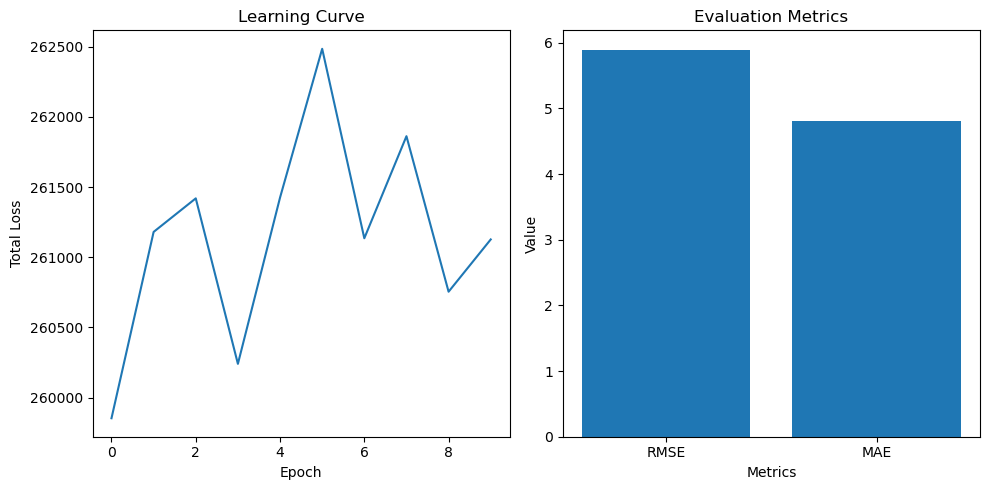

Testing
   user_idx  item_idx      pred
0       116      1348  0.697930
1       226       149  3.463008
2       263       109 -4.471497
3       261       228 -3.581485
4       109      1336  8.673152
RMSE: 5.893784342252216
MAE: 4.801351640211155


In [4]:
import torch
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

trainData = pd.read_csv('ml100k.train.rating', header=None, names=['user', 'item', 'rate'], sep='\t')
testData = pd.read_csv('ml100k.test.rating', header=None, names=['user', 'item', 'rate'], sep='\t')

# 创建userid和itemid的映射表
user2idx = {user: idx for idx, user in enumerate(trainData.user.unique())}
item2idx = {item: idx for idx, item in enumerate(trainData.item.unique())}

# 将训练集和测试集中的userid和itemid替换为连续索引
trainData['user_idx'] = trainData['user'].map(user2idx)
trainData['item_idx'] = trainData['item'].map(item2idx)
testData['user_idx'] = testData['user'].map(user2idx)
testData['item_idx'] = testData['item'].map(item2idx)

userIdx = trainData.user_idx.values
itemIdx = trainData.item_idx.values

num_users = len(user2idx)
num_items = len(item2idx)
K = 20
lambd = 0.00001
learning_rate = 1e-6

U = torch.randn([num_users, K], requires_grad=True)
P = torch.randn([num_items, K], requires_grad=True)

optimizer = torch.optim.SGD([U, P], lr=learning_rate)

print('Training')

loss_values = []  # 用于存储损失函数值的列表

for epoch in range(10):
    total_loss = 0.0
    for i in range(len(trainData)):
        user_idx = trainData.iloc[i]['user_idx']
        item_idx = trainData.iloc[i]['item_idx']

        pos_pred = torch.dot(U[user_idx], P[item_idx])  # 正样本预测评分

        neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 随机选择一个负样本
        while neg_item_idx in trainData[trainData['user_idx'] == user_idx]['item_idx'].values:
            neg_item_idx = torch.randint(num_items, size=(1,)).item()  # 确保负样本不在用户的已有物品中

        neg_pred = torch.dot(U[user_idx], P[neg_item_idx])  # 负样本预测评分

        loss = -torch.log(torch.sigmoid(pos_pred - neg_pred))  # BPR损失函数
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_values.append(total_loss)
    print('Epoch:', epoch + 1, 'Loss:', total_loss)

# 绘制学习曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Learning Curve')

def getRanking():
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    ranking = []
    for i in range(len(testData_cleaned)):
        user_idx = int(testData_cleaned.iloc[i]['user_idx'])
        item_idx = int(testData_cleaned.iloc[i]['item_idx'])

        assert user_idx < num_users, "Invalid user index"
        assert item_idx < num_items, "Invalid item index"

        pred = torch.dot(U[user_idx], P[item_idx])
        ranking.append((user_idx, item_idx, pred.item()))

    return pd.DataFrame(ranking, columns=['user_idx', 'item_idx', 'pred'])

def calculate_metrics(ranking):
    testData_cleaned = testData.dropna()  # 清除包含NaN值的行
    predicted_ratings = ranking['pred'].values
    actual_ratings = testData_cleaned['rate'].values
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    return rmse, mae

ranking = getRanking()

# 评价指标可视化
plt.subplot(1, 2, 2)
rmse, mae = calculate_metrics(ranking)

metrics_names = ['RMSE', 'MAE']
metrics_values = [rmse, mae]
plt.bar(metrics_names, metrics_values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

plt.tight_layout()  # 确保图表不重叠
plt.show()

print('Testing')
print(ranking.head())
print('RMSE:', rmse)
print('MAE:', mae)